# Exploratory Data Analysis

## 1. Import Libraries

In [384]:
# Import libraries for 
import math
import itertools
import random
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
tf.get_logger().setLevel('ERROR')

# Setting to show more columns
pd.set_option("display.max_columns", 30)

## 2. Ingest Data

In [3]:
data_dir = '../data/turbofan.csv'
df = pd.read_csv(data_dir)
df.head()

,unit_number,time,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
df.describe()

,unit_number,time,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


- There are a total of 100 engine failures in our dataset, consisting of a total of 20631 cycles. 
- Setting 3 & sensors 18 & 19 have 0 standard deviation and provide no information; they can be removed later on.

## 3. Create a Target Feature


- We can create a new column called "RC" (remaining cycles) assuming that engines have 0 RC on the last day; this will be our target feature to predict
- We also note that the objective is to predict if there will be an engine failure within in the next 15 cycles, which would be a binary classification problem; however, we can still use this regression approach to predict the same.

In [5]:
#Creating the RUL column
def add_remaining_cycles(df):
    """Appends the RC (remaining cycles) column to the dataframe"""
    
    _df = df.copy()
    total_cycles_df = _df[['unit_number','time']].groupby(['unit_number']).max()
    total_cycles_dict = dict(zip(total_cycles_df.index, total_cycles_df.time))
    _df['RC'] = _df.unit_number.map(total_cycles_dict)-_df.time
    return _df

df = add_remaining_cycles(df)

# Removing the time column
df.drop(columns=['time'], inplace=True)
df.head()

,unit_number,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RC
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


- Lets split the dataset into train and test, we can do this by taking 1 engine in every 5 for the test set to get a 80/20 split.
- We can then train and evaluate baseline linear regression model for future comparison.

In [202]:
# Split (80/20) by unit number into train and test sets.
def train_test_split_by_engine(df, verbose=False):
    features = [x for x in df.columns if x.startswith('setting') or x.startswith('sensor')]
    train_df = df[df.unit_number%5!=0].copy()
    test_df = df[df.unit_number%5==0].copy()
    if verbose:
        print(f'Train set engine numbers: {train_df.unit_number.unique()}')
        print(f'Test set engine numbers: {test_df.unit_number.unique()}')
    X_train = train_df[features]
    X_test = test_df[features]
    y_train = train_df['RC']
    y_test = test_df['RC']
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_by_engine(df)

# Instantiate and fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict and evaluate
pred_train = linreg.predict(X_train)
train_RMSE = mean_squared_error(y_train, pred_train)**0.5
train_R2 = r2_score(y_train, pred_train)
print(f'Baseline train set RMSE is {train_RMSE:.2f} & R2 score is {train_R2:.2f}.')

pred_test = linreg.predict(X_test)
test_RMSE = mean_squared_error(y_test, pred_test)**0.5
test_R2 = r2_score(y_test, pred_test)
print(f'Baseline test set RMSE is {test_RMSE:.2f} & R2 score is {test_R2:.2f}.')


Baseline train set RMSE is 45.66 & R2 score is 0.58.
Baseline test set RMSE is 40.48 & R2 score is 0.59.


## 4. Scaling & Plots

- Before plotting, lets scale the data; we will use a standard scaler which will centre the data along its mean, and divide it by its standard deviation.
- To understand the data better, we can plot an individual engine as well as all engines to observe any trends.

In [7]:
scaler = StandardScaler()
scale_columns = df.loc[:,'setting1':'sensor21'].columns
scaler.fit(df[scale_columns])
df_scaled = df.copy()
df_scaled[scale_columns] = scaler.transform(df[scale_columns])
df_scaled.head()

,unit_number,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RC
0,1,-0.315980,-1.372953,0.0,0.0,-1.721725,-0.134255,-0.925936,-1.776357e-15,0.141683,1.121141,-0.516338,-0.862813,0.0,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-1.387779e-17,-0.781710,0.0,0.0,1.348493,1.194427,191
1,1,0.872722,-1.031720,0.0,0.0,-1.061780,0.211528,-0.643726,-1.776357e-15,0.141683,0.431930,-0.798093,-0.958818,0.0,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-1.387779e-17,-0.781710,0.0,0.0,1.016528,1.236922,190
2,1,-1.961874,1.015677,0.0,0.0,-0.661813,-0.413166,-0.525953,-1.776357e-15,0.141683,1.008155,-0.234584,-0.557139,0.0,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-1.387779e-17,-2.073094,0.0,0.0,0.739891,0.503423,189
3,1,0.324090,-0.008022,0.0,0.0,-0.661813,-1.261314,-0.784831,-1.776357e-15,0.141683,1.222827,0.188048,-0.713826,0.0,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-1.387779e-17,-0.781710,0.0,0.0,0.352598,0.777792,188
4,1,-0.864611,-0.690488,0.0,0.0,-0.621816,-1.251528,-0.301518,-1.776357e-15,0.141683,0.714393,-0.516338,-0.457059,0.0,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-1.387779e-17,-0.136018,0.0,0.0,0.463253,1.059552,187


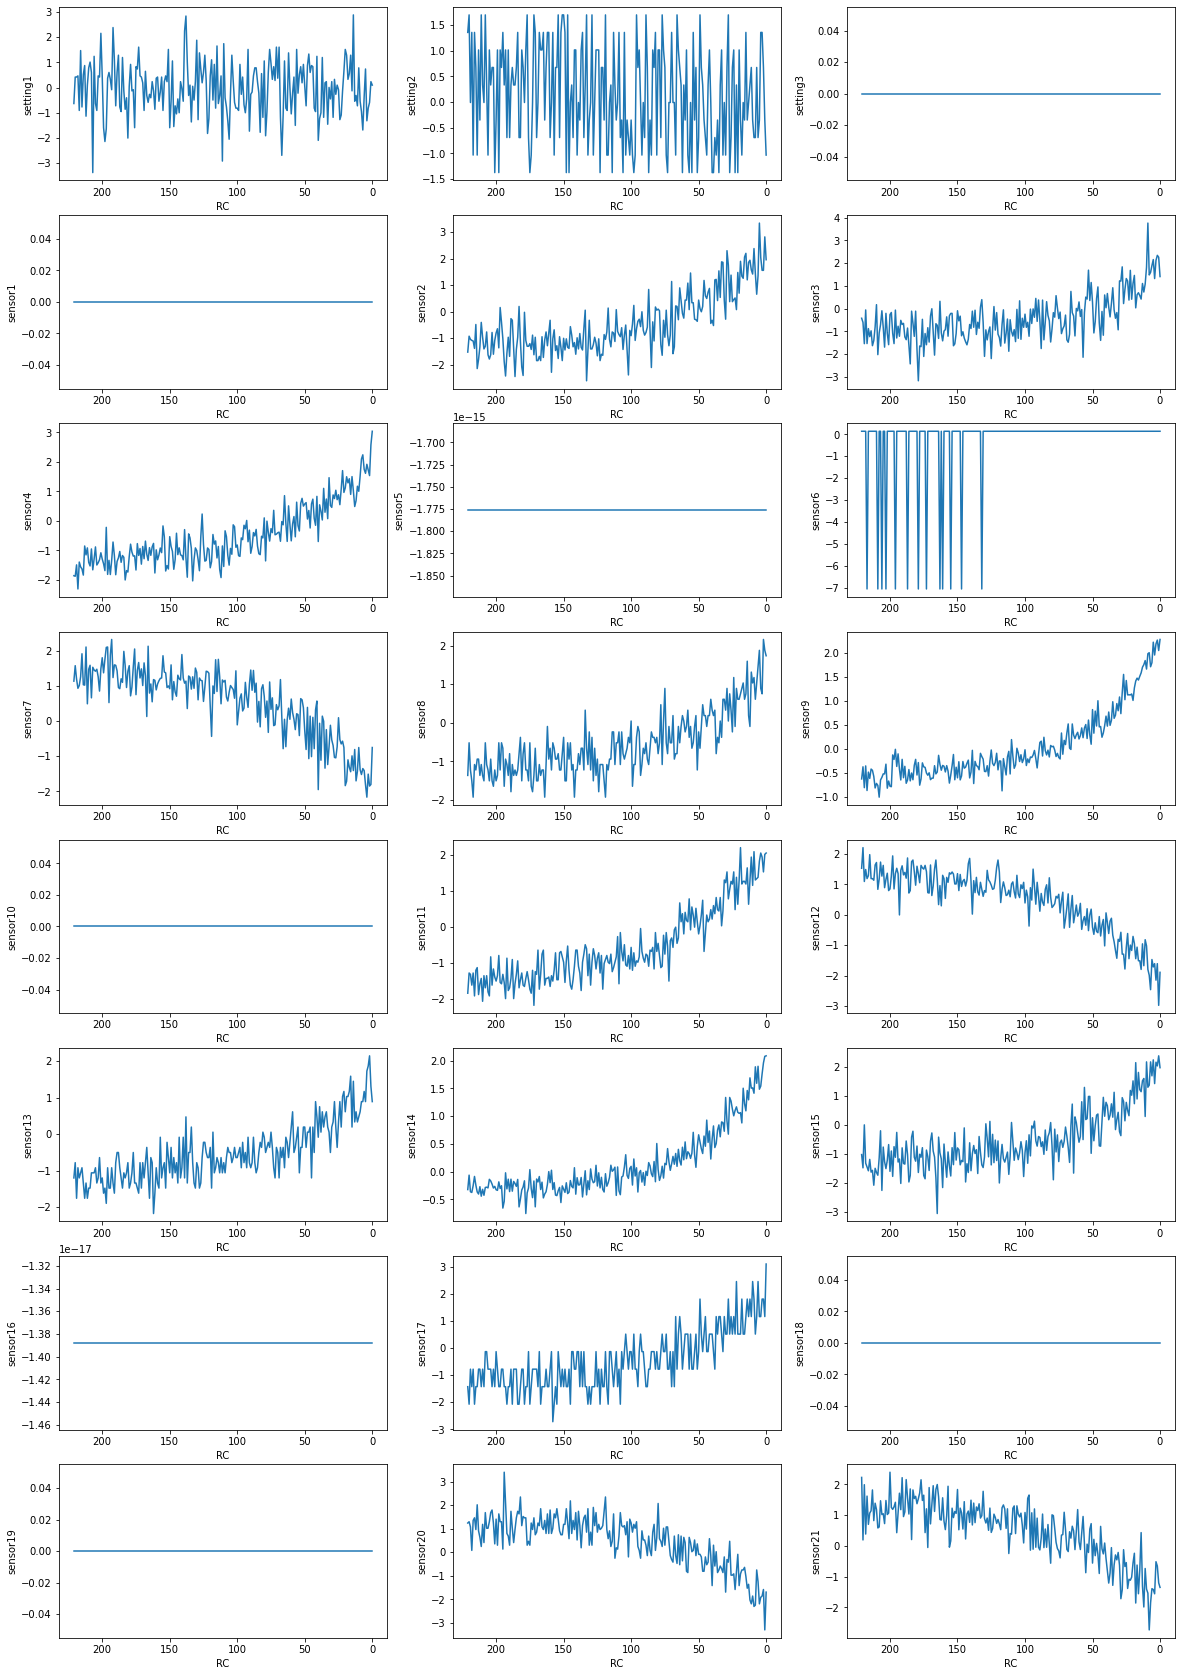

In [8]:
# Plot 1 engine settings and sensors
feature_names = df_scaled.loc[:,'setting1':'sensor21'].columns
fig, ax = plt.subplots(math.ceil(len(feature_names)/3), 3,figsize=(20,30))
for idx, name in enumerate(feature_names):
    sns.lineplot(data=df_scaled[df_scaled.unit_number==10],x='RC',y=name,legend=False, ax=ax[idx//3,idx%3])
    ax[idx//3,idx%3].invert_xaxis()
plt.show()


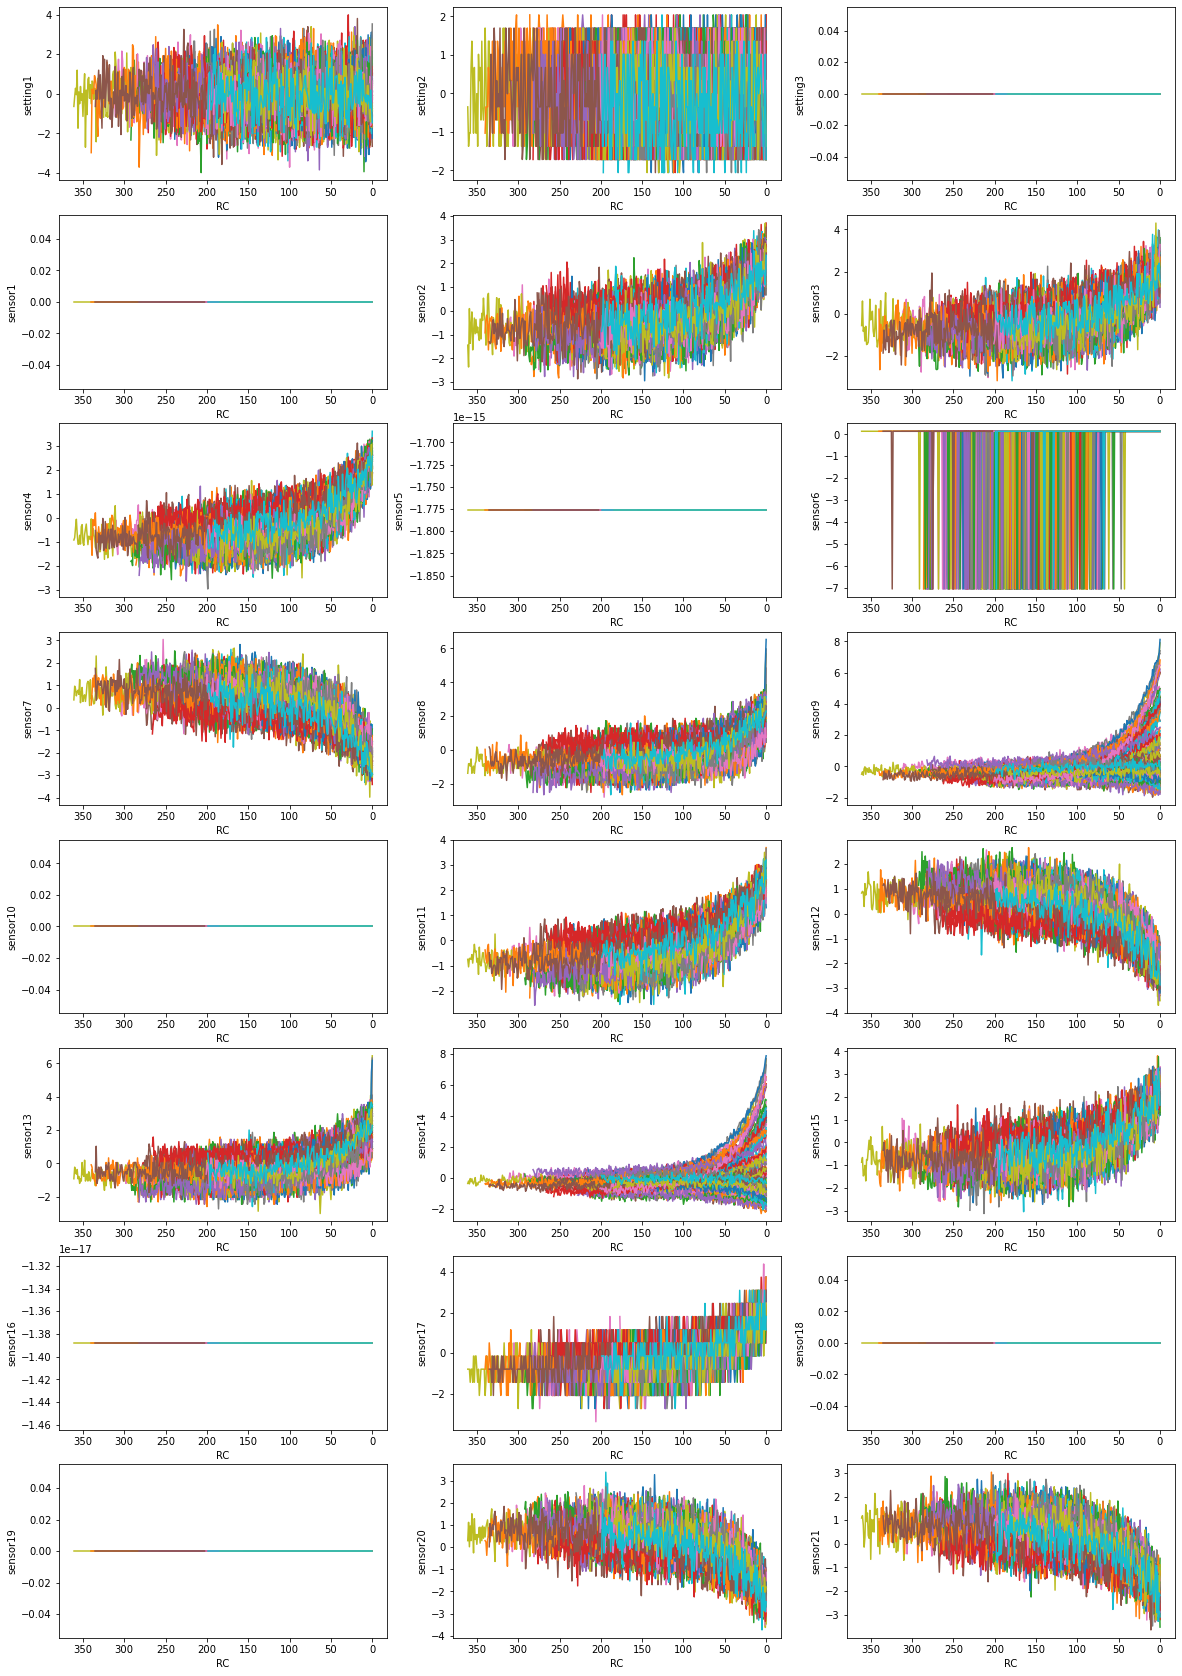

In [9]:
# Plot all engine settings and sensors
feature_names = df_scaled.loc[:,'setting1':'sensor21'].columns
fig, ax = plt.subplots(math.ceil(len(feature_names)/3), 3,figsize=(20,30))
for idx, name in enumerate(feature_names):
    for i in range(df_scaled.unit_number.min(),df_scaled.unit_number.max()+1):
        sns.lineplot(data=df_scaled[df_scaled.unit_number==i],x='RC',y=name,legend=False, ax=ax[idx//3,idx%3])
    ax[idx//3,idx%3].invert_xaxis()
plt.show()

- From the plots above, as well as the column statics from above, we can tell that:
    - Columns to be removed:
        - Setting 3 & sensors 1, 5, 10, 16, 18 & 19 doesnt seem to hold any information and can be removed.
    - Columns to be keep:
        - Sensors 2, 3, 4, 8, 11, 13, 15 & 17 show an upward trend towards engine failure. (Negative correlation to RC)
        - Sensors 7, 12, 20 & 21, show a downward trend towards engine failure. (Positive correlation to RC)
    - Columns to test:
        - Setting 1 & 2 have been described to affect engine performance. However, they may not affect its remaining life. We will test these values to see if they have any effect on the model.
        - Sensor 6 is binary (only 2 values). However, it frequents the lower value during normal engine operation and seems to remain at its upper value towards engine failure (ie. last 50 days)
        - Sensors 9 & 14 displays a divergent trend towards engine failure. These sensor signals dont seem to distinguish failts very well and might do more harm if included; we will try a model with and without these sensors.
    - There is alot of sensor signal noise, we can use a smoothing algorithm to smoothen the noise.

In [10]:
# Summary of features to keep, drop, and test
drop_features = ['setting3','sensor1','sensor5','sensor10','sensor16','sensor18','sensor19']
remaining_features = [x for x in df.loc[:,'setting1':'sensor21'].columns if x not in drop_features]
test_features = ['setting1','setting2','sensor6','sensor9','sensor14']

## 5. Data Preparation

- Before we proceed, we shall try to smooth the signals of sensors.
- We will prepare the data to use an LSTM model to predict the remaining cycles. 
- The idea is to use a the data from the past cycles to determine the remaining cycles, therefore, we will need to prepare the data into window frames according to the sequence length chosen.

### 5.1 Smoothing

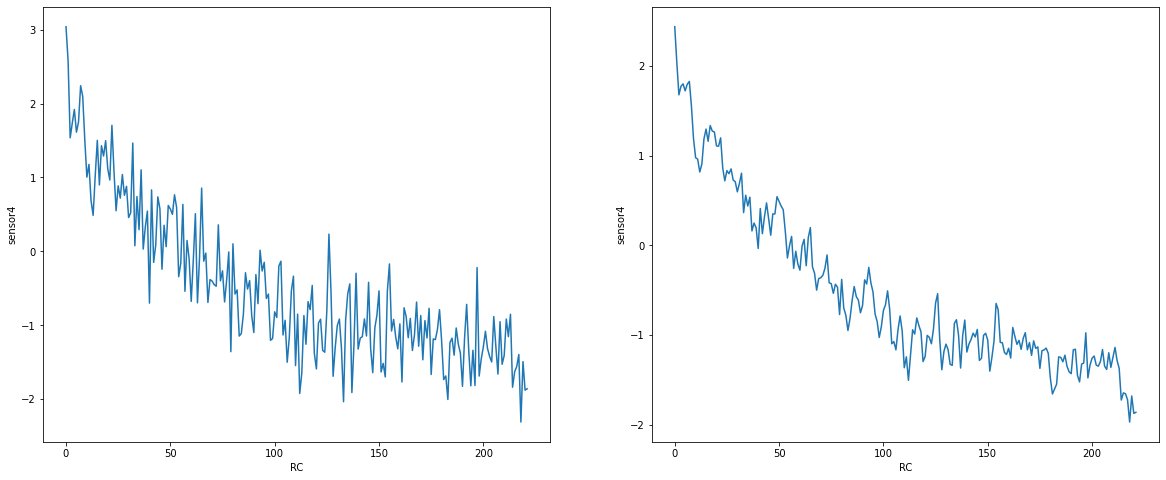

In [223]:
def perform_smoothing(df, n_samples=0, alpha=0.4):
    """Performs a smoothing of all sensor signals."""
    df = df.copy()
    # First, calculate the exponential weighted mean of desired sensors
    sensors = [x for x in df.columns if x.startswith('sensor')]
    df[sensors] = df.groupby('unit_number')[sensors].apply(lambda x: x.ewm(alpha=alpha).mean())
    
    # Second, drop first n_samples of each unit_nr to reduce filter delay
    def create_mask(data, samples):
        result = np.ones_like(data)
        result[0:samples] = 0
        return result
    
    mask = df.groupby('unit_number')['unit_number'].transform(create_mask, samples=n_samples).astype(bool)
    df = df[mask]
    
    return df

df_smoothed = perform_smoothing(df_scaled,alpha=0.4)
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=df_scaled[df_scaled.unit_number==10],x='RC',y='sensor4',legend=False,ax=ax[0])
sns.lineplot(data=df_smoothed[df_smoothed.unit_number==10],x='RC',y='sensor4',legend=False,ax=ax[1])
plt.show()

- Above is an example of exponential smoothing appplied on a single sensor from an engine. The alpha parameter can be tuned (a lower value will result in a more agressive smoothing), we shall tune this later on.

### 5.1. Preparing the Sequenced Windows

In [429]:
def train_test_split_by_engine(df, verbose=False):
    """Splits the dataframe into a train set and test set by the engine unit number."""
    train_df = df[df.unit_number%5!=0].copy()
    test_df = df[df.unit_number%5==0].copy()
    if verbose:
        print(f'Train set engine numbers: {train_df.unit_number.unique()}')
        print(f'Test set engine numbers: {test_df.unit_number.unique()}')
    train = train_df
    test = test_df
    return train, test

train_df, test_df = train_test_split_by_engine(df_smoothed)
train_df.shape, test_df.shape

((16656, 26), (3975, 26))

In [227]:
sequence_length=5 # This parameter can be tuned later on

def data_generator(df, sequence_length, return_label, feature_cols, label_col='RC'):
    """A sequenced window generator. Will yield a windowed frame of either target labels or input features."""
    _df = df.sort_values(by=['unit_number','RC'],ascending=[True,False]).reset_index(drop=True)
    units = _df.unit_number.unique()
    for unit in units:
        unit_df = _df[_df.unit_number==unit].reset_index(drop=True)
        for i in range(len(unit_df)-sequence_length+1):
            frame_df = unit_df.iloc[i:i+sequence_length]
            features = np.array(frame_df[feature_cols].values)
            target = np.array(frame_df.iloc[-1][label_col])
            if return_label:
                yield target
            else: 
                yield features

X_train_gen=data_generator(train_df,return_label=False,sequence_length=sequence_length,feature_cols=remaining_features)
next(X_train_gen)

array([[-0.31597968, -1.3729532 , -1.72172539, -0.13425518, -0.92593596,
         0.14168333,  1.12114057, -0.51633841, -0.86281332, -0.2664666 ,
         0.33426184, -1.05889024, -0.26907104, -0.6038157 , -0.78170979,
         1.34849274,  1.19442705],
       [ 0.87272193, -1.03172035, -1.30925934,  0.08185962, -0.74955465,
         0.14168333,  0.69038407, -0.69243503, -0.922816  , -0.2196643 ,
         0.85966027, -0.62436259, -0.5026796 , -0.39883827, -0.78170979,
         1.14101474,  1.22098637],
       [-1.96187421,  1.01567674, -0.97892938, -0.17070426, -0.63547225,
         0.14168333,  0.85251223, -0.45883747, -0.73624623, -0.62560257,
         1.11734416, -0.77511708, -0.52765392, -0.5265453 , -1.4405794 ,
         0.93635956,  0.85488251],
       [ 0.32409042, -0.00802181, -0.83319558, -0.67190369, -0.70411134,
         0.14168333,  1.02269381, -0.16155551, -0.72594259, -1.04558714,
         1.50519249, -0.52212079, -0.52421723, -1.19066285, -1.13779005,
         0.66808692

- Since the dataset is not large, we use the generator to create a numpy array of our full train and test datasets.

In [239]:
# Create train and test input features and target labels.
params = {'sequence_length':15,
          'feature_cols':remaining_features}
X_train = np.stack(list(data_generator(train_df,return_label=False,**params)))
y_train = np.stack(list(data_generator(train_df,return_label=True,**params)))
X_test = np.stack(list(data_generator(test_df,return_label=False,**params)))
y_test = np.stack(list(data_generator(test_df,return_label=True,**params)))

In [430]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (8736, 100, 15)
y_train shape: (8736,)
X_test shape: (1995, 100, 15)
y_test shape: (1995,)


## 5.2. Creating & evaluate the simple LSTM model

In [250]:
# Prepare the LSTM Model
model = Sequential()
model.add(LSTM(50,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [251]:
# We use an early stopping method to reduce the time needed to complete training if the MSE does not improve within 3 epochs.
callback = EarlyStopping(monitor='val_loss',patience=3)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    epochs=30,
                    batch_size=64,
                    callbacks=[callback])

Epoch 1/30
243/243 [==============================] - 3s 9ms/step - loss: 12411.3701 - val_loss: 8968.8955
Epoch 2/30
243/243 [==============================] - 2s 8ms/step - loss: 10010.5693 - val_loss: 7312.4253
Epoch 3/30
243/243 [==============================] - 2s 8ms/step - loss: 8388.1807 - val_loss: 6013.3945
Epoch 4/30
243/243 [==============================] - 2s 8ms/step - loss: 7075.6411 - val_loss: 4969.0435
Epoch 5/30
243/243 [==============================] - 2s 8ms/step - loss: 5998.2349 - val_loss: 4121.5059
Epoch 6/30
243/243 [==============================] - 2s 8ms/step - loss: 5106.8530 - val_loss: 3430.4812
Epoch 7/30
243/243 [==============================] - 2s 8ms/step - loss: 4374.1050 - val_loss: 2887.5559
Epoch 8/30
243/243 [==============================] - 2s 8ms/step - loss: 3772.4609 - val_loss: 2448.1270
Epoch 9/30
243/243 [==============================] - 2s 8ms/step - loss: 3269.6931 - val_loss: 2082.5962
Epoch 10/30
243/243 [=======================

In [254]:
# Evaluate simple LSTM model
pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, pred)**0.5
R2 = r2_score(y_test, pred)
print(f'Test set RMSE is {RMSE:.2f} & R2 score is {R2:.2f}.')

Test set RMSE is 36.24 & R2 score is 0.63.


- This is a 10% improvement in RMSE, and a 7% improvement in R2 compared to the baseline linear regression model.

## 6. Hyper-Parameter Tuning

### 6.1. Possibilities

- Lets breakdown what possible parameters we can improve on using hyper-parameter tuning.

In [432]:
alpha_list = [0.01,0.05,0.08,0.1,0.2,0.3,0.4]
sequence_list = [1,5,10,20,30,40,50,70]
nodes_list = [[32], [64], [128], [256], [32,64], [64,128], [128,256], [128,256,128]]
dropout_list = [0.0, 0.1, 0.2, 0.3, 0.4]
activation_functions = ['tanh','relu','sigmoid']
batch_size_list = [8,16,32,64,128,256]
feature_removal_list = list(itertools.chain.from_iterable(\
    [list(itertools.combinations(test_features,x+1)) for x in range(len(test_features))]))
feature_removal_list = [list(x) for x in feature_removal_list]

tuning_options = np.prod([len(alpha_list),
                          len(sequence_list),
                          len(nodes_list),
                          len(dropout_list),
                          len(activation_functions),
                          len(batch_size_list),
                          len(feature_removal_list)])
tuning_options

1249920

- Other parameters such as learning rate, learning rate schedulers, optimizers could be tuned. But due to the time constraints and the exploding gradient nature of adding more parameters, I will not be tuning those parameters.
- Cross validation could also be used to validate each combination, however, it will take too long for only a slight difference.
- There are already over 1 million combinations of parameters to test. This will take too long. Therefore I will use an approach as such:
    - Tune the feature removal list to pick out which input features to remove from our dataset first,
    - Then random pick the other parameters with the time I have available to train each model.

In [433]:
tuning_options = np.prod([len(alpha_list),
                          len(sequence_list),
                          len(nodes_list),
                          len(dropout_list),
                          len(activation_functions),
                          len(batch_size_list)])

tuning_options, len(feature_removal_list)

(40320, 31)

- Using this approach, we have cut down our options to 40320 parameters to randomly search, and 31 parameters to gridsearch prior.

### 6.2. Prepare some functions to prepare data and create model according to those parameters

In [ ]:
def prep_data(df, exclude_features, remaining_features, alpha, sequence_length):
    """Prepares the data. 
    Applies scaling, smoothing, train test split, feature removal, 
    & generates the input features and target labels.

    Args:
        df (pd.Dataframe): The input dataframe.
        exclude_features (list): List of features to be removed from remaining features.
        remaining_features (list): List of input features to be included.
        alpha (float): 0-1. The alpha parameter for smoothing; a lower value results in more smoothing.
        sequence_length (int): The length of the rolling window to be used.

    Returns:
        np.array(s): X_train, X_test, y_train, y_test
    """
    _df = df.copy()

    # Scaling
    scaler = StandardScaler()
    scale_columns = _df.loc[:,'setting1':'sensor21'].columns
    scaler.fit(_df[scale_columns])
    _df[scale_columns] = scaler.transform(_df[scale_columns])

    # Perform Signal Smoothing
    _df = perform_smoothing(_df, alpha=alpha)

    # Train Test Split by Engine
    train_df, test_df = train_test_split_by_engine(_df)
    
    # Drop Features
    train_df = train_df[['unit_number','RC']+remaining_features].drop(exclude_features, axis=1)
    test_df = test_df[['unit_number','RC']+remaining_features].drop(exclude_features, axis=1)

    # Create Input Features & Target Labels
    params = {'sequence_length':sequence_length,
              'feature_cols':[x for x in remaining_features if x not in exclude_features]}
    X_train = np.stack(list(data_generator(train_df,return_label=False,**params)))
    y_train = np.stack(list(data_generator(train_df,return_label=True,**params)))
    X_test = np.stack(list(data_generator(test_df,return_label=False,**params)))
    y_test = np.stack(list(data_generator(test_df,return_label=True,**params)))

    return X_train, X_test, y_train, y_test


In [ ]:
def create_model(input_shape, nodes_per_layer, dropout, activation):
    """Function to create a LSTM model with dropout.

    Args:
        input_shape (tuple): tuple with 2 integers, ie. (10,15)
        nodes_per_layer (list): list of nodes in each layer, ie. [64,128]
        dropout (float): The amount of dropout after each LSTM layer.
        activation (str): The activation function to use.

    Returns:
        tf.model: A tensorflow model instance.
    """
    model = Sequential()
    for idx, nodes in enumerate(nodes_per_layer):
        if idx==0:
            if idx==len(nodes_per_layer)-1:
                model.add(LSTM(nodes,input_shape=input_shape,activation=activation))
            else:
                model.add(LSTM(nodes,input_shape=input_shape,activation=activation, return_sequences=True))
        else:
            if idx==len(nodes_per_layer)-1:
                model.add(LSTM(nodes,activation=activation))
            else:
                model.add(LSTM(nodes,activation=activation, return_sequences=True))
        model.add(Dropout(dropout))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    return model

### 6.3. Test features to remove tuning

In [370]:
results = pd.DataFrame(columns=['MSE', 'features_removed'])

for feature_removal in tqdm(feature_removal_list):
    X_train, X_test, y_train, y_test = prep_data(df,feature_removal,remaining_features,alpha=0.4,sequence_length=15)
    input_shape = (X_train.shape[1],X_train.shape[2])
    model = create_model(input_shape, [128], 0, 'tanh')
    callback = EarlyStopping(monitor='val_loss',patience=3)

    history = model.fit(X_train,
                        y_train,
                        validation_data=(X_test,y_test),
                        epochs=100,
                        batch_size=64,
                        callbacks=[callback],
                        verbose=0)

    MSE = history.history['val_loss'][-1]
    results = results.append(pd.DataFrame({'MSE':MSE,'features_removed':[feature_removal]}))

results = results.sort_values(['MSE']).reset_index(drop=True)
results.head(10)


100%|██████████| 31/31 [20:34<00:00, 39.83s/it]


,MSE,features_removed
0,1066.509521,"[sensor9, sensor14]"
1,1076.963623,"[setting2, sensor6, sensor9]"
2,1103.060059,"[setting1, setting2]"
3,1107.194702,"[setting1, setting2, sensor6, sensor9, sensor14]"
4,1115.872803,"[setting1, setting2, sensor6, sensor9]"
5,1122.762939,[sensor6]
6,1124.214844,"[setting1, sensor9, sensor14]"
7,1126.461548,"[sensor6, sensor14]"
8,1133.851929,"[setting2, sensor9, sensor14]"
9,1138.240845,"[setting1, setting2, sensor14]"


- Removing sensor9 and sensor14 gave the best MSE. Therefore we will remove those and continue our tuning of other parameters.

### 6.4. Random search HP tuning

- Here we will tune the following parameters, & change them as we tune so that we can obtain the best combination.

In [435]:
alpha_list = [0.01,0.05,0.08,0.1,0.2,0.3,0.4]
sequence_list = [70,85,100] # Original list: [1,5,10,20,30,40,50,70,85,100]
nodes_list = [[32], [64], [128], [256], [32,64], [64,128], [128,256], [128,256,128]]
dropout_list = [0.0, 0.1, 0.2, 0.3, 0.4]
activation_functions = ['tanh'] # Original list: ['tanh','relu','sigmoid']
batch_size_list = [64,128,256] # Original list: [8,16,32,64,128,256]

# Removed features as obtained from the experiment above
feature_removal = ['sensor9','sensor14'] # Original list: ['sensor9','sensor14']

# Directory to save and continue appending to results
save_DIR = '../results/HP_tuning.csv'

In [417]:
# This section of code can be run multiple times and can be stopped at anytime.
# It will save every hyperparameter run results into a .csv file, and read from it was run again.
# Every iteration of tuning takes about 1.5 minute; ie. 20 iterations will take approx. 30 minutes.
iterations = 10

# If there is a saved results file, we will read from it instead of creating a new one.
try:
    results = pd.read_csv(save_DIR)
except:
    results = pd.DataFrame(columns=['MSE','alpha','sequence_length','nodes_per_layer','dropout','activation','batch_size'])

pbar = tqdm(range(iterations))
for i in pbar:
    # Pick random samples from the list of parameters
    alpha = random.sample(alpha_list, 1)[0]
    sequence_length = random.sample(sequence_list, 1)[0]
    nodes_per_layer = random.sample(nodes_list, 1)[0]
    dropout = random.sample(dropout_list, 1)[0]
    activation = random.sample(activation_functions, 1)[0]
    batch_size = random.sample(batch_size_list, 1)[0]
    params_list = [alpha,sequence_length,nodes_per_layer,dropout,activation,batch_size]
    pbar.set_description('alp:{},sequence:{},nodes:{},dropout:{},acti:{},batch_size:{}'.format(*params_list))

    # This "if" statement is such that we will not perform a tuning for already tested parameters
    if params_list not in results.loc[:,'alpha':'batch_size'].values.tolist():
        # Prepare data and create model
        X_train, X_test, y_train, y_test = prep_data(df,feature_removal,remaining_features,alpha,sequence_length)
        input_shape = (X_train.shape[1],X_train.shape[2])
        model = create_model(input_shape, nodes_per_layer, dropout, activation)
        callback = EarlyStopping(monitor='val_loss',patience=2)

        # Fit model using the chosen parameters
        history = model.fit(X_train,
                            y_train,
                            validation_data=(X_test,y_test),
                            epochs=100,
                            batch_size=batch_size,
                            callbacks=[callback],
                            verbose=0
                            )

        # Save results to the HP tuning results file
        MSE = history.history['val_loss'][-1]
        results = results.append(pd.DataFrame({'MSE':MSE,
                                            'alpha':alpha,
                                            'sequence_length':sequence_length,
                                            'nodes_per_layer':[nodes_per_layer],
                                            'dropout':dropout,
                                            'activation':activation,
                                            'batch_size':batch_size}))

        results = results.sort_values(['MSE']).reset_index(drop=True)
        results.to_csv(save_DIR, index=False)

alp:0.08,sequence:100,nodes:[64],dropout:0.3,acti:tanh,batch_size:8: 100%|██████████| 10/10 [09:56<00:00, 59.61s/it]     


- The above script has been run multiple times. Appending to the same results file.

In [419]:
pd.read_csv(save_DIR).head(20)

,MSE,alpha,sequence_length,nodes_per_layer,dropout,activation,batch_size
0,280.982452,0.30,100,"[32, 64]",0.4,tanh,128
1,294.502808,0.08,100,[128],0.0,tanh,16
2,296.055420,0.30,100,"[32, 64]",0.0,tanh,32
3,320.516083,0.30,100,"[64, 128]",0.1,tanh,8
4,365.315704,0.08,100,[64],0.3,tanh,8
5,373.232758,0.08,70,[128],0.0,tanh,8
6,392.436646,0.05,70,[64],0.2,tanh,64
7,428.586670,0.30,85,"[32, 64]",0.1,tanh,128
8,435.612152,0.01,85,[128],0.2,tanh,32
9,448.370270,0.05,70,[128],0.1,tanh,128


- It is apparent that a longer sequence length results in a better result, ie. 100 cycles. However, a long sequence length will mean that the client will need to perform data collection of the engine sensors prior to its failure. Lets inspect if any engine fails within 100+15 cycles.

In [422]:
df.groupby('unit_number').max()['RC'].describe()

count    100.000000
mean     205.310000
std       46.342749
min      127.000000
25%      176.000000
50%      198.000000
75%      228.250000
max      361.000000
Name: RC, dtype: float64

- There are no engines that fail within the first 115 days, therefore, we will proceed to use the best parameters per the following:

In [436]:
pd.read_csv(save_DIR).head(1)

,MSE,alpha,sequence_length,nodes_per_layer,dropout,activation,batch_size
0,280.982452,0.3,100,"[32, 64]",0.4,tanh,128


- The MSE is 280.98, which results in an RMSE of 16.76, compared to our baseline RMSE of 40.48, this is a 58.5% improvement. 
- We will create proceed to create a few python scripts to facilitate training and creation of a model, and to be used for inference in the furure.